In [1]:
%load_ext autoreload
%autoreload 2

import operator
import pandas as pd

import datamol as dm

### Cluster a list of molecules

In [2]:
# Get some mols
data = dm.data.freesolv()
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

# Cluster the mols
clusters, mol_clusters = dm.cluster_mols(mols, cutoff=0.7)

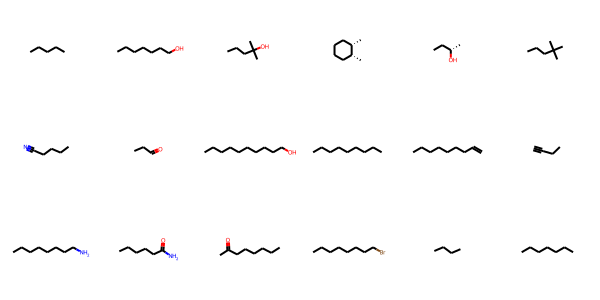

In [3]:
# Cluster #1
dm.viz.to_image(mol_clusters[0], mol_size=(100, 100), n_cols=6, max_mols=18)

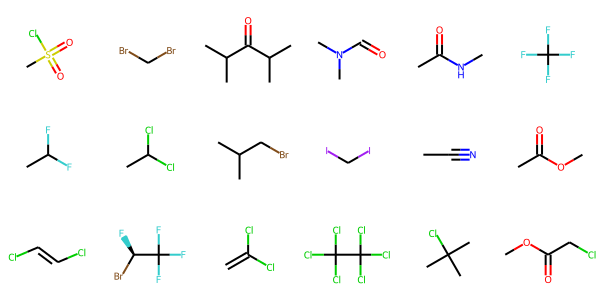

In [4]:
# Cluster #2
dm.viz.to_image(mol_clusters[1], mol_size=(100, 100), n_cols=6, max_mols=18)

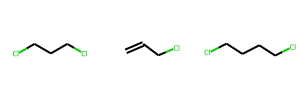

In [5]:
# Cluster #3
dm.viz.to_image(mol_clusters[2], mol_size=(100, 100), n_cols=6, max_mols=18)

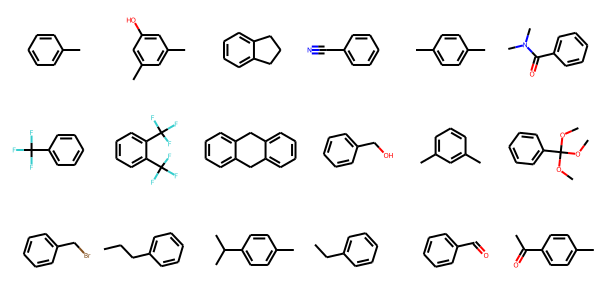

In [6]:
# Cluster #4
dm.viz.to_image(mol_clusters[3], mol_size=(100, 100), n_cols=6, max_mols=18)

---

### Pick diverse molecules from a list (based on their fingerprint)

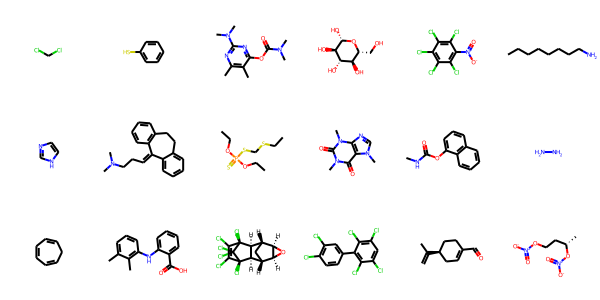

In [7]:
# Get some mols
data = dm.data.freesolv()
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

indices, picks = dm.pick_diverse(mols, npick=18)
dm.viz.to_image(picks, mol_size=(100, 100), n_cols=6)

---

### Pick centroids from a set of molecules

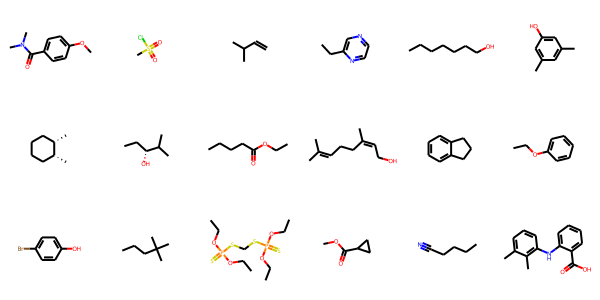

In [8]:

data = dm.data.freesolv()
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

indices, centroids = dm.pick_centroids(mols, npick=18, threshold=0.7, method="sphere", n_jobs=-1)
dm.viz.to_image(centroids, mol_size=(100, 100), n_cols=6)


#### Assign molecules to the existing centroids for clustering

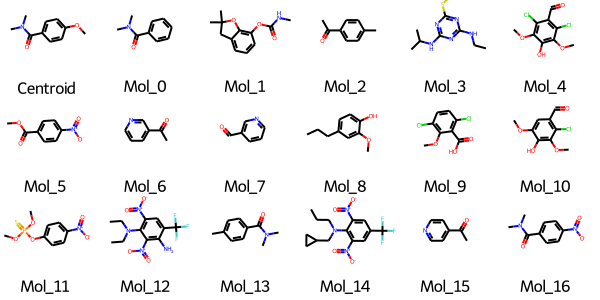

In [12]:
# remove centroids for comparison
query = [m for i, m in enumerate(mols) if i not in indices]
cluster_map, cluster_list = dm.assign_to_centroids(query, centroids, n_jobs=-1)
centroid_0 = centroids[0]
cluster_0 = cluster_list[0][:17]
legends = ['Centroid'] + [f"Mol_{i}" for i in range(len(cluster_0))]
dm.viz.to_image([centroid_0]+cluster_0, legends=legends, mol_size=(100, 100), n_cols=6)
